In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy import stats 



In [2]:
from sklearn.datasets.samples_generator import make_regression
X, y = make_regression(n_samples = 1000, 
                       n_features=1, 
                       noise=10,
                       random_state=42)

In [3]:
X[:10]

array([[-1.75873949],
       [ 1.03184454],
       [-0.48760622],
       [ 0.18645431],
       [ 0.72576662],
       [ 0.97255445],
       [ 0.64537595],
       [ 0.68189149],
       [-1.43014138],
       [ 1.06667469]])

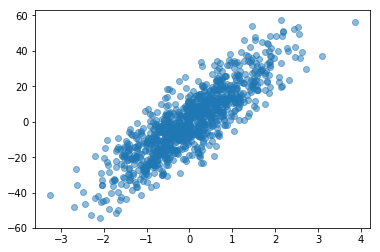

In [4]:
plt.plot(X,y, 'o', alpha=0.5)

In [5]:
import linear_model
import imp
imp.reload(linear_model)

<module 'linear_model' from '/Users/sungchulchoi/workspace/machine_learning_from_scratch_with_python/code/ch8/linear_model.py'>

In [6]:
gd_lr = linear_model.LinearRegressionGD(eta0=0.001, epochs=10000, batch_size=1, shuffle=False)
bgd_lr = linear_model.LinearRegressionGD(eta0=0.001, epochs=10000, batch_size=len(X), shuffle=False)
sgd_lr = linear_model.LinearRegressionGD(eta0=0.001, epochs=10000, batch_size=1, shuffle=True)
msgd_lr = linear_model.LinearRegressionGD(eta0=0.001, epochs=10000, batch_size=100, shuffle=True) 

In [7]:
gd_lr.fit(X,y)

In [8]:
bgd_lr.fit(X,y)

In [9]:
sgd_lr.fit(X,y)

In [10]:
msgd_lr.fit(X,y)

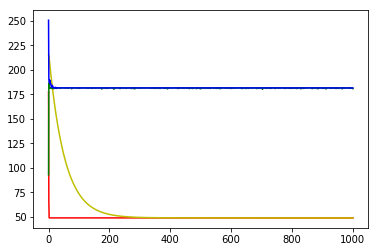

In [11]:
plt.plot(range(len(gd_lr.cost_history)), gd_lr.cost_history, c="r")
plt.plot(range(len(bgd_lr.cost_history)), bgd_lr.cost_history, c="y")
plt.plot(range(len(sgd_lr.cost_history)), sgd_lr.cost_history, c="G")
plt.plot(range(len(msgd_lr.cost_history)), msgd_lr.cost_history, c="b")


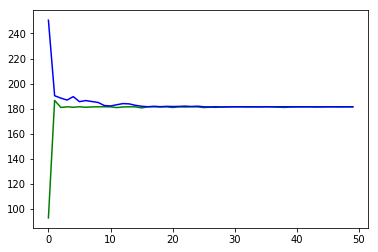

In [12]:
plt.plot(range(50), sgd_lr.cost_history[:50], c="G")
plt.plot(range(50), msgd_lr.cost_history[:50], c="b")

In [13]:
gd_lr.coef, bgd_lr.coef, sgd_lr.coef, msgd_lr.coef

(array([ 16.67526053]),
 array([ 16.63229787]),
 array([ 0.59894253]),
 array([ 0.02550671]))

In [14]:
import pandas as pd

data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [15]:
import numpy as np
ad_cost = np.asarray([data['TV'].values,data['radio'].values,data['newspaper'].values]).T
sales = np.asarray(data['sales'].values)

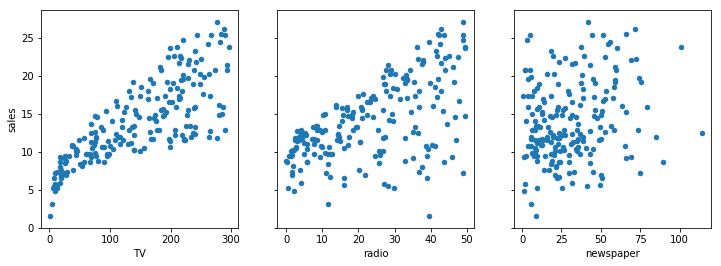

In [16]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 3, sharey=True)
data.plot(kind='scatter', x='TV', y='sales', ax=axs[0], figsize=(12, 4))
data.plot(kind='scatter', x='radio', y='sales', ax=axs[1])
data.plot(kind='scatter', x='newspaper', y='sales', ax=axs[2])

In [17]:
from sklearn import preprocessing
X_scaled = preprocessing.scale(ad_cost)
y = sales
X_scaled [:5]

array([[ 0.96985227,  0.98152247,  1.77894547],
       [-1.19737623,  1.08280781,  0.66957876],
       [-1.51615499,  1.52846331,  1.78354865],
       [ 0.05204968,  1.21785493,  1.28640506],
       [ 0.3941822 , -0.84161366,  1.28180188]])

In [18]:
gd_lr = linear_model.LinearRegressionGD(eta0=0.1, epochs=1000, batch_size=1, shuffle=False)
bgd_lr = linear_model.LinearRegressionGD(eta0=0.1, epochs=1000, batch_size=len(X_scaled), shuffle=False)
sgd_lr = linear_model.LinearRegressionGD(eta0=0.1, epochs=1000, batch_size=1, 
                                         shuffle=True, learning_rate_decay=0.9)
msgd_lr = linear_model.LinearRegressionGD(eta0=0.1, epochs=1000, batch_size=100, shuffle=True,
                                         learning_rate_decay=0.9) 

In [19]:
gd_lr.fit(X_scaled,y)
bgd_lr.fit(X_scaled,y)
sgd_lr.fit(X_scaled,y)
msgd_lr.fit(X_scaled,y)

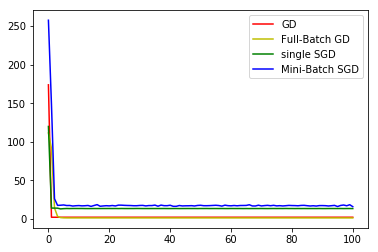

In [20]:
plt.plot(range(len(gd_lr.cost_history)), gd_lr.cost_history, c="r", label='GD')
plt.plot(range(len(bgd_lr.cost_history)), bgd_lr.cost_history, c="y", label='Full-Batch GD')
plt.plot(range(len(sgd_lr.cost_history)), sgd_lr.cost_history, c="G", label='single SGD')
plt.plot(range(len(msgd_lr.cost_history)), msgd_lr.cost_history, c="b",label='Mini-Batch SGD')
plt.legend(loc='upper right')
plt.show()